<h1 style='font-size: 15px;  font-weight: 600'>1.0: Import Required Libraries</h1>

In [1]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt  
import seaborn as sns  
import pandas as pd  
import numpy as np 
import warnings 
import math

warnings.simplefilter("ignore")  
pd.set_option('display.max_columns', 8) 
pd.set_option('display.float_format', lambda x: '%.2f' % x) 
print("......Libraries Loaded Successfully.........")

......Libraries Loaded Successfully.........


<h1 style='font-size: 18px; font-family: Colonna MT; font-weight: 600'>3.0: Import and Preprocessing Dataset</h1>

In [2]:
def Loading_iris_data():
    from sklearn.datasets import load_iris
    iris = load_iris()
    X, y = iris.data , iris.target 
    
    feature_names, target_names = iris.feature_names, iris.target_names
    df = pd.DataFrame(X, columns=feature_names)
    df['Species'] = y
    df['Species'] = df['Species'].map({i: name for i, name in enumerate(target_names)})
    return df

df = Loading_iris_data()
display(df.head(10))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa
5,5.40,3.90,1.70,0.40,setosa
6,4.60,3.40,1.40,0.30,setosa
7,5.00,3.40,1.50,0.20,setosa
8,4.40,2.90,1.40,0.20,setosa
9,4.90,3.10,1.50,0.10,setosa


In [3]:
for column in df.columns.tolist(): print(f"{'-'*15} {column}")

--------------- sepal length (cm)
--------------- sepal width (cm)
--------------- petal length (cm)
--------------- petal width (cm)
--------------- Species


<h4 style='font-size: 14px; color: blue; font-weight: 600'>3.2: Columns Profiling</h4>

In [4]:
def column_summary(df):
    summary_data = []
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df

summary_df = column_summary(df)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,sepal length (cm),float64,0,150,35,"{5.0: 10, 6.3: 9, 5.1: 9, 6.7: 8, 5.7: 8, 6.4:..."
1,sepal width (cm),float64,0,150,23,"{3.0: 26, 2.8: 14, 3.2: 13, 3.4: 12, 3.1: 11, ..."
2,petal length (cm),float64,0,150,43,"{1.4: 13, 1.5: 13, 4.5: 8, 5.1: 8, 1.3: 7, 1.6..."
3,petal width (cm),float64,0,150,22,"{0.2: 29, 1.3: 13, 1.5: 12, 1.8: 12, 1.4: 8, 2..."
4,Species,object,0,150,3,"{'setosa': 50, 'versicolor': 50, 'virginica': 50}"


<h3 style='font-size: 18px; color: Blue; font-family: Colonna MT; font-weight: 600'>8.1: Correlation Coefficients </h3>

In [5]:
def compute_correlation_matrix(df, method="pearson", visualize=True):
    if method not in ['pearson', 'spearman', 'kendall']:
        raise ValueError("Invalid method. Choose from 'pearson', 'spearman', or 'kendall'.")
    
    numeric_df = df.select_dtypes(include=['number'])
    corr_matrix = numeric_df.corr(method=method)
    return corr_matrix


correlation_matrix = compute_correlation_matrix(df, method="pearson")
correlation_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.00,-0.12,0.87,0.82
sepal width (cm),-0.12,1.00,-0.43,-0.37
petal length (cm),0.87,-0.43,1.00,0.96
petal width (cm),0.82,-0.37,0.96,1.00


<h3 style='font-size: 18px; color: blue; font-family: Colonna MT; font-weight: 600'>8.2: Correlation Coefficients Heatmap </h3>

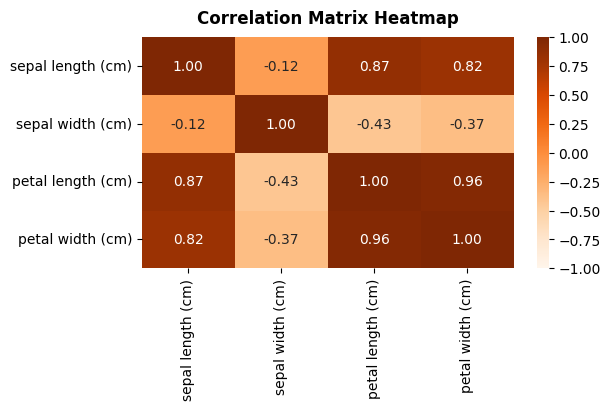

In [6]:
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='Oranges', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap', fontsize=12, fontweight='bold', pad=10)
plt.grid(False)
plt.show()

<h3 style='font-size: 18px; font-family: Colonna MT; font-weight: 600'>8.3: Pearson’s</h3>

**Pearson’s r**: This measures the strength and direction of the linear relationship between two continuous variables. Values range from -1 to 1, with 0 indicating no relationship, 1 indicating a perfect positive relationship, and -1 indicating a perfect negative relationship.

In [7]:
def compute_pearson_r(df, numerical_columns):
    results = []

    for i, col1 in enumerate(numerical_columns):
        for col2 in numerical_columns[i+1:]:
            r_value, p_value = pearsonr(df[col1], df[col2])
            direction = ("Positive" if r_value > 0 else 
                         "Negative" if r_value < 0 else "No correlation")
            strength = ("Strong" if abs(r_value) >= 0.7 else 
                        "Moderate" if abs(r_value) >= 0.3 else "Weak")

            results.append({
                'Variable 1': col1, 'Variable 2': col2,
                'Pearson\'s r': r_value, 'P-value': p_value,
                'Direction': direction, 'Strength': strength
            })
    
    return pd.DataFrame(results)

Metrics = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']
pearson_results_df = compute_pearson_r(df, numerical_columns=Metrics)
pearson_results_df.head(10)

,Variable 1,Variable 2,Pearson's r,P-value,Direction,Strength
0,sepal length (cm),sepal width (cm),-0.12,0.15,Negative,Weak
1,sepal length (cm),petal length (cm),0.87,0.00,Positive,Strong
2,sepal length (cm),petal width (cm),0.82,0.00,Positive,Strong
3,sepal width (cm),petal length (cm),-0.43,0.00,Negative,Moderate
4,sepal width (cm),petal width (cm),-0.37,0.00,Negative,Moderate
5,petal length (cm),petal width (cm),0.96,0.00,Positive,Strong


<h3 style='font-size: 18px; color: blue; font-family: Colonna MT; font-weight: 600'>8.3: Relationship Between Variables (Scatterplot Matrix)</h3>

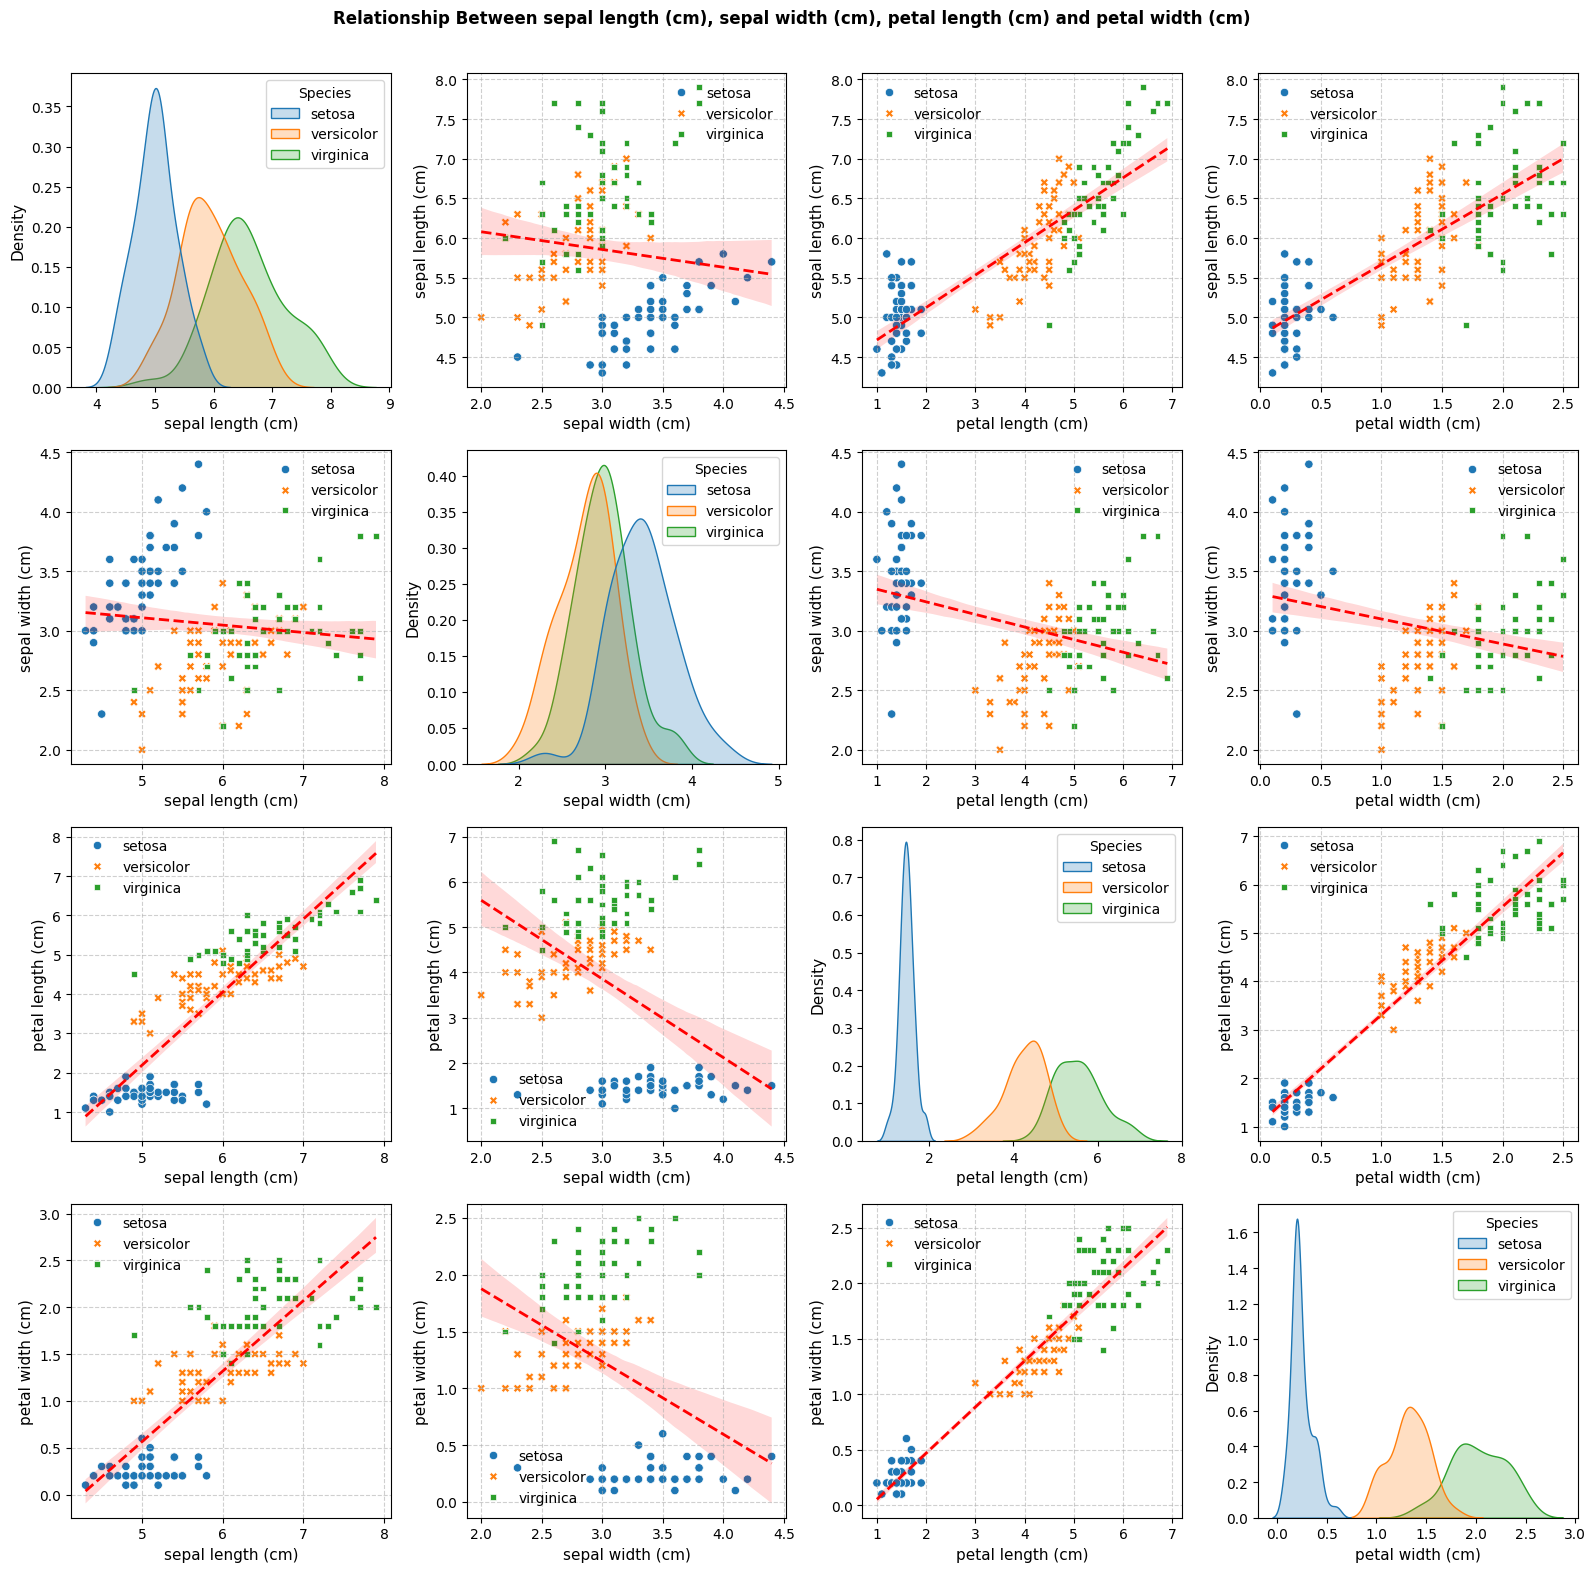

In [8]:

def scatterplot_matrix(data, Variables, group, title):
    num_variables = len(Variables)
    rows = num_variables 
    cols = num_variables
    
    fig, axes = plt.subplots(rows, cols, figsize=(4* cols, 4*rows))
    fig.suptitle(title, fontsize=12, fontweight='bold')
    
    for i in range(num_variables):
        for j in range(num_variables):
            ax = axes[i, j]
            if i == j:
                sns.kdeplot(data=df, x=df[Variables[j]], ax=ax, fill=True, hue=group)
                # Diagonal: Leave it empty or add variable name
                #ax.text(0.5, 0.5, Variables[i], fontsize=12, ha='center', va='center')
                ax.set_xlabel(Variables[j], fontsize=11)
                ax.set_ylabel('Density', fontsize=11)
            else:
                sns.scatterplot(data=df, x=df[Variables[j]], y=df[Variables[i]], ax=ax, hue=group, style=group, alpha=1)
                sns.regplot(data=df, x=df[Variables[j]], y=df[Variables[i]], ax=ax,  scatter=False, line_kws={'color': 'red', 'linestyle': '--', 'lw': 2})
                
                ax.set_xlabel(Variables[j], fontsize=11)
                ax.set_ylabel(Variables[i], fontsize=11)
                ax.grid(linestyle='--', alpha=0.6)
                ax.legend(frameon=False)
                
    
    for i in range(num_variables):
        for j in range(num_variables):
            if i == j:
                axes[i, j].axis('on') 
    
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

title = "Relationship Between sepal length (cm), sepal width (cm), petal length (cm) and petal width (cm) "
Variables = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
scatterplot_matrix(df, Variables, group='Species', title=title)

---

This analysis was performed by **Jabulente**, a passionate and dedicated data scientist with a strong commitment to using data to drive meaningful insights and solutions. For inquiries, collaborations, or further discussions, please feel free to reach out via.  

    
<div align="center">  
    
[![GitHub](https://img.shields.io/badge/GitHub-Jabulente-black?logo=github)](https://github.com/Jabulente)  [![LinkedIn](https://img.shields.io/badge/LinkedIn-Jabulente-blue?logo=linkedin)](https://linkedin.com/in/jabulente-208019349)  [![Email](https://img.shields.io/badge/Email-jabulente@hotmail.com-red?logo=gmail)](mailto:Jabulente@hotmail.com)  

</div>

<h5 style='font-size: 25px; color: crimson; font-family: Colonna MT; font-weight: 600; text-align: center'>THE END</h5>
